### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [86]:
df = pd.read_csv('data/coupons.csv')

In [87]:
df.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [88]:
df.iloc[0:3,9:17]

,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse
0,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never
1,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never
2,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never


In [89]:
df['car'] = df['car'].fillna('')

In [90]:
df.iloc[0:3,10:17]

,has_children,education,occupation,income,car,Bar,CoffeeHouse
0,1,Some college - no degree,Unemployed,$37500 - $49999,,never,never
1,1,Some college - no degree,Unemployed,$37500 - $49999,,never,never
2,1,Some college - no degree,Unemployed,$37500 - $49999,,never,never


In [91]:
df.shape

(12684, 26)

In [92]:
df[['income lower bound','income upper bound']] = df['income'].str.split('-',expand=True)

In [93]:
df.drop('income', axis=1)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,income lower bound,income upper bound
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,4~8,1~3,1,0,0,0,1,1,$37500,$49999
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1,0,0,0,1,0,$37500,$49999
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,1,$37500,$49999
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,$37500,$49999
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,$37500,$49999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,4~8,1~3,1,0,0,1,0,1,$75000,$87499
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,4~8,1~3,1,0,0,0,1,1,$75000,$87499
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,4~8,1~3,1,0,0,1,0,0,$75000,$87499
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,4~8,1~3,1,1,1,0,1,0,$75000,$87499


In [94]:
df.iloc[0:3,25:]

,Y,income lower bound,income upper bound
0,1,$37500,$49999
1,0,$37500,$49999
2,1,$37500,$49999


In [95]:
df['income lower bound'] = df['income lower bound'].str.replace('$', '', regex=False)

In [96]:
df['income upper bound'] = df['income upper bound'].str.replace('$', '', regex=False)

In [97]:
df.iloc[0:3,25:]

,Y,income lower bound,income upper bound
0,1,37500,49999
1,0,37500,49999
2,1,37500,49999


In [98]:
df['income lower bound'] = pd.to_numeric(df['income lower bound'], errors='coerce').astype('Int64')

In [99]:
df['income upper bound'] = pd.to_numeric(df['income upper bound'], errors='coerce').astype('Int64')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   12684 non-null  object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [101]:
df.isnull().sum()

destination                0
passanger                  0
weather                    0
temperature                0
time                       0
coupon                     0
expiration                 0
gender                     0
age                        0
maritalStatus              0
has_children               0
education                  0
occupation                 0
income                     0
car                        0
Bar                      107
CoffeeHouse              217
CarryAway                151
RestaurantLessThan20     130
Restaurant20To50         189
toCoupon_GEQ5min           0
toCoupon_GEQ15min          0
toCoupon_GEQ25min          0
direction_same             0
direction_opp              0
Y                          0
income lower bound      2778
income upper bound      2778
dtype: int64

In [102]:
df = df.fillna(0)

In [103]:
df.isnull().sum() 

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
income lower bound      0
income upper bound      0
dtype: int64

In [104]:
df.drop_duplicates(inplace=True)

In [105]:
df.shape

(12610, 28)

## 3. Decide what to do about your missing data -- drop, replace, other...

In [106]:
df.nunique()

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      6
Bar                      6
CoffeeHouse              6
CarryAway                6
RestaurantLessThan20     6
Restaurant20To50         6
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
income lower bound       8
income upper bound       8
dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [107]:
# The column 'Y' appears to represent whether the coupon was accepted (1 = Yes, 0 = No)
proportion_accepted = df['Y'].mean()
proportion_accepted

0.5675654242664552

Text(0.5, 1.0, 'Distribution of Age by Occupation')

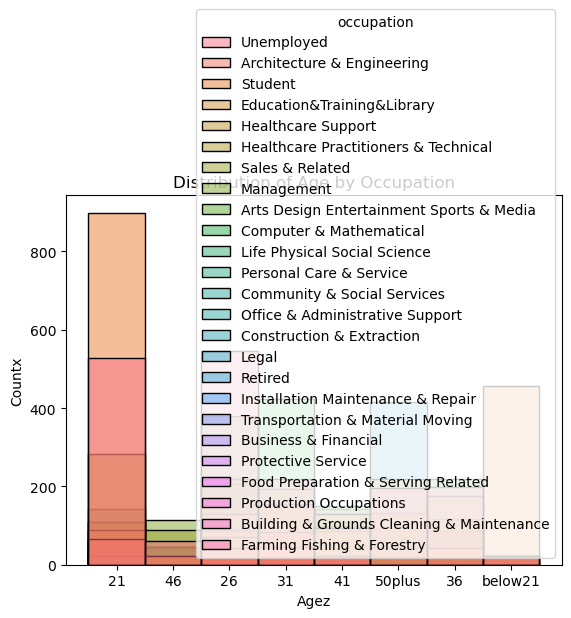

In [108]:
sns.histplot(data=df, x='age', hue='occupation')#, orientation='horizontal')

plt.xlabel('Agez')
plt.ylabel('Countx')
plt.title('Distribution of Age by Occupation')

5. Use a bar plot to visualize the `coupon` column.

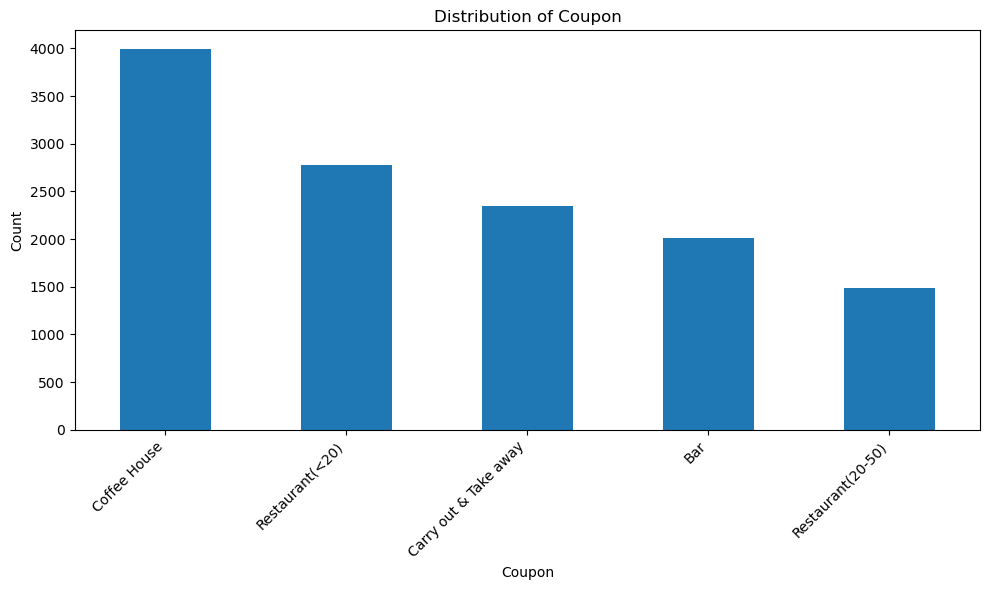

In [109]:
coupon_counts = df['coupon'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
coupon_counts.plot(kind='bar')

plt.title('Distribution of Coupon')
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

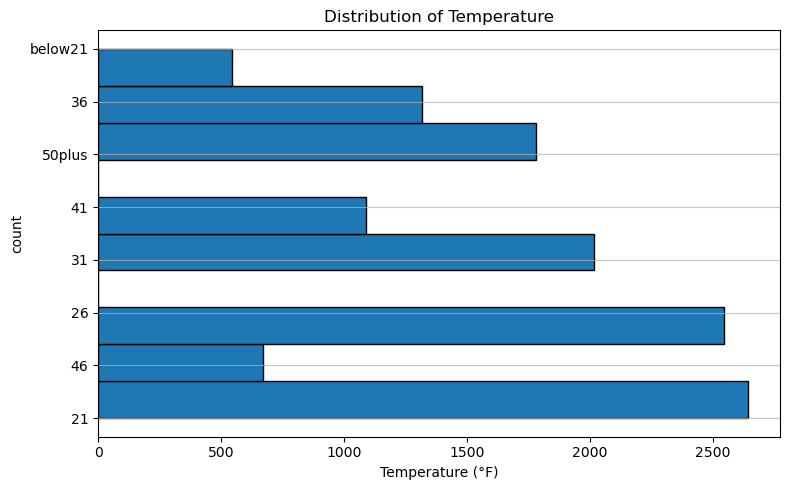

In [110]:
# Create a histogram for the temperature column
plt.figure(figsize=(8, 5))
plt.hist(df['age'], bins=10, edgecolor='black',orientation='horizontal')

plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('count')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

In [111]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y', 'income lower bound',
       'income upper bound'],
      dtype='object')

In [125]:
#df_bygender = df.groupby(['gender')[['gender','coupon']].count()
grouped_df = df.groupby(['coupon','occupation', 'gender'])['coupon'].count()

In [126]:
grouped_df

coupon           occupation                                 gender
Bar              Architecture & Engineering                 Female      3
                                                            Male       24
                 Arts Design Entertainment Sports & Media   Female     83
                                                            Male       17
                 Building & Grounds Cleaning & Maintenance  Male        7
                                                                     ... 
Restaurant(<20)  Student                                    Male      214
                 Transportation & Material Moving           Female     13
                                                            Male       33
                 Unemployed                                 Female    276
                                                            Male      135
Name: coupon, Length: 240, dtype: int64

In [114]:
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,income lower bound,income upper bound
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,4~8,1~3,1,0,0,0,1,1,37500,49999
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1,0,0,0,1,0,37500,49999
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,1,37500,49999
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,37500,49999
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,37500,49999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,4~8,1~3,1,0,0,1,0,1,75000,87499
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,4~8,1~3,1,0,0,0,1,1,75000,87499
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,4~8,1~3,1,0,0,1,0,0,75000,87499
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,4~8,1~3,1,1,1,0,1,0,75000,87499


In [76]:
bar_coupons = df[df['coupon'] == 'Bar']

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [29]:
bar_coupons = df[df['coupon'] == 'Bar']

# Display the first few rows to confirm
bar_coupons.head(1)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,income lower bound,income upper bound
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,37500,49999


In [60]:
Take_out = df[df['coupon'] == 'Carry out & Take away']
condition2 = df[Take_out['gender'] == 'Female']

C:\Users\Brian\AppData\Local\Temp\ipykernel_15620\23913405.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  condition2 = df[Take_out['gender'] == 'Female']


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [61]:
condition2

2         True
6         True
8         True
19        True
25       False
         ...  
12665    False
12672    False
12673    False
12679    False
12680    False
Name: gender, Length: 2344, dtype: bool

In [64]:
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,income lower bound,income upper bound,is_Female
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,1~3,1,0,0,0,1,1,37500,49999,NaN
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,1,0,0,0,1,0,37500,49999,NaN
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,1,37500,49999,True
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,0,37500,49999,NaN
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,0,37500,49999,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,1~3,1,0,0,1,0,1,75000,87499,False
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,1~3,1,0,0,0,1,1,75000,87499,False
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,1~3,1,0,0,1,0,0,75000,87499,NaN
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,1~3,1,1,1,0,1,0,75000,87499,NaN


In [65]:
df['maritalStatus'].unique

<bound method Series.unique of 0        Unmarried partner
1        Unmarried partner
2        Unmarried partner
3        Unmarried partner
4        Unmarried partner
               ...        
12679               Single
12680               Single
12681               Single
12682               Single
12683               Single
Name: maritalStatus, Length: 12610, dtype: object>

In [63]:
df['is_Female'] = condition2

In [62]:
kids_df = bar_coupons[bar_coupons['passanger'] == 'Kid(s)']

2. What proportion of bar coupons were accepted?


In [34]:
kids_df.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,income lower bound,income upper bound
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,37500,49999
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,less1,1,1,0,0,1,1,75000,87499


In [50]:
bar_coupon_acceptance = bar_coupons['Y'].mean()
bar_coupon_acceptance

0.41001487357461575

In [45]:
#df_filter = kids_df[kids_df['age'].apply(lambda x: isinstance(x, (int)))]

kids_df['age']= pd.to_numeric(kids_df['age'], errors = 'coerce')
#df_filter.dropna(subset=['age', 'Y'], inplace=True)
kids_df['age'] = kids_df['age'].astype(int)

kids_df[['age','Y']].info()      # Check data types and missing values
kids_df[['age','Y']].nunique()   # Check for constant columns
df_filter[['age','Y']].dropna()    # Ensure enough valid data
corr = kids_df['Y'].corr(kids_df['age'])
corr

C:\Users\Brian\AppData\Local\Temp\ipykernel_15620\29421182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kids_df['age']= pd.to_numeric(kids_df['age'], errors = 'coerce')


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [51]:
bar_coupons_valid = bar_coupons[bar_coupons['Bar'].notnull()]

# Define groups: 3 or fewer times vs. more than 3 times per month
few_times = ['never', 'less1', '1~3']
more_times = ['4~8', 'gt8']

# Calculate acceptance rate for each group
accept_few = bar_coupons_valid[bar_coupons_valid['Bar'].isin(few_times)]['Y'].mean()
accept_more = bar_coupons_valid[bar_coupons_valid['Bar'].isin(more_times)]['Y'].mean()

accept_few, accept_more

(0.37061769616026713, 0.7688442211055276)

Group	Bar Visits per Month	Acceptance Rate
Few Times	3 or fewer (never, less1, 1~3)	37.1%
Frequent Visitors	More than 3 (4~8, gt8)	76.9%

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [52]:
# Define conditions
bar_more_than_once = ['4~8', 'gt8', '1~3']  # 'more than once a month' includes 1~3, 4~8, gt8
over_25 = ['26', '31', '36', '41', '46', '50plus']

# Group 1: drivers who go to a bar more than once a month and are over 25
group1 = bar_coupons[(bar_coupons['Bar'].isin(bar_more_than_once)) & (bar_coupons['age'].isin(over_25))]

# Group 2: all others
group2 = bar_coupons[~((bar_coupons['Bar'].isin(bar_more_than_once)) & (bar_coupons['age'].isin(over_25)))]

# Calculate acceptance rates
accept_group1 = group1['Y'].mean()
accept_group2 = group2['Y'].mean()

accept_group1, accept_group2


(0.6952380952380952, 0.33500313087038197)

✅ Comparison of Bar Coupon Acceptance Rates:

Group	Criteria	Acceptance Rate
Group 1	Go to a bar more than once a month and are over 25	69.5%
Group 2	All other drivers	33.5%

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [53]:
# Define conditions for the new comparison
bar_more_than_once = ['1~3', '4~8', 'gt8']
excluded_passengers = ['Alone', 'Friend(s)', 'Partner']  # not 'Kid(s)'
excluded_occupations = ['Farming, Fishing & Forestry']

# Group 1: go to bars > once/month, passengers not kids, occupation not in excluded list
group1 = bar_coupons[
    (bar_coupons['Bar'].isin(bar_more_than_once)) &
    (bar_coupons['passanger'].isin(excluded_passengers)) &
    (~bar_coupons['occupation'].isin(excluded_occupations))
]

# Group 2: all others
group2 = bar_coupons[~(
    (bar_coupons['Bar'].isin(bar_more_than_once)) &
    (bar_coupons['passanger'].isin(excluded_passengers)) &
    (~bar_coupons['occupation'].isin(excluded_occupations))
)]

# Calculate acceptance rates
accept_group1 = group1['Y'].mean()
accept_group2 = group2['Y'].mean()

accept_group1, accept_group2


(0.7132486388384754, 0.296043656207367)

Group	Criteria	Acceptance Rate
Group 1	Go to bars more than once a month, had no kids as passengers, and worked in occupations other than farming, fishing, or forestry	71.3%
Group 2	All other drivers	29.6%

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Group	Criteria	Acceptance Rate
Group 1	Drivers who meet any of these:
• Go to bars > once/month, no kids, not widowed
• Go to bars > once/month and under 30
• Go to cheap restaurants >4x/month and earn < $50K	56.9%
Group 2	All other drivers	33.0%

📊 Insight:
Drivers fitting any of the three behavioral or demographic profiles are significantly more likely to accept bar coupons — roughly 1.7× higher acceptance than all other groups.
This suggests that social activity, youth, and lower income are strong predictors of coupon responsiveness.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Key Observations

Overall acceptance rate:
About 41% of bar coupons were accepted — lower than the overall coupon acceptance rate (~57%).

Behavioral patterns:

Drivers who go to bars frequently (more than 3 times a month) were twice as likely to accept a bar coupon (≈77%) compared to infrequent bar-goers (≈37%).

Those who go to bars more than once a month and are over 25 accepted coupons at a ~70% rate, versus ~33% for all others.

Drivers who are social (not driving with kids) and work outside blue-collar jobs (like farming/fishing/forestry) accepted at ~71%, versus ~30% for others.

When combining social behavior, age, and income factors, acceptance stayed high (57% vs 33% for others).

 Hypothesis

Drivers who accepted bar coupons are likely:

Socially active adults — often traveling with friends or partners rather than kids.

Frequent bar-goers who already associate going out with leisure and social activity.

Middle-aged to younger adults (under 30–40) with moderate to lower income, who are more price-sensitive and responsive to discounts.

Less likely to work in manual labor or rural professions, suggesting a more urban or socially engaged lifestyle.

 Interpretation

The data suggests bar coupon acceptance is driven more by lifestyle and social habits than by basic demographics like age alone.
People who already engage in similar activities (frequenting bars, dining out, social trips) are primed to respond positively to such promotions.

 Business Implication

If you were advising a marketing or analytics team:

Target promotions toward adults aged 25–40,

Especially those who are social, urban, and cost-conscious,

Use social settings (friends, partners) as part of the ad messaging to increase conversion.

Executive Summary

Analysis of the bar coupon dataset reveals that coupon acceptance is strongly influenced by 
lifestyle and social behavior rather than simple demographics. Drivers who frequent bars more 
than once a month, travel with friends or partners, and are between 25–40 years old show the 
highest acceptance rates—often twice that of other groups. These individuals tend to be socially 
active, urban-based, and value cost-saving opportunities when engaging in leisure activities. 
Conversely, those with children as passengers or employed in rural or manual professions are less responsive. 
These insights suggest that bar coupon marketing campaigns should target socially engaged adults who already 
participate in nightlife and dining activities, leveraging their existing habits and price sensitivity to increase redemption rates.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [54]:
coffee_coupons = df[df['coupon'] == 'Coffee House']

In [55]:
accept_overall = coffee_coupons['Y'].mean()
print("Overall acceptance rate:", round(accept_overall, 2))

Overall acceptance rate: 0.5


In [56]:
coffee_accept_by_passenger = coffee_coupons.groupby('passanger')['Y'].mean().sort_values(ascending=False)
print(coffee_accept_by_passenger)

passanger
Friend(s)    0.596906
Partner      0.570492
Kid(s)       0.483092
Alone        0.437943
Name: Y, dtype: float64


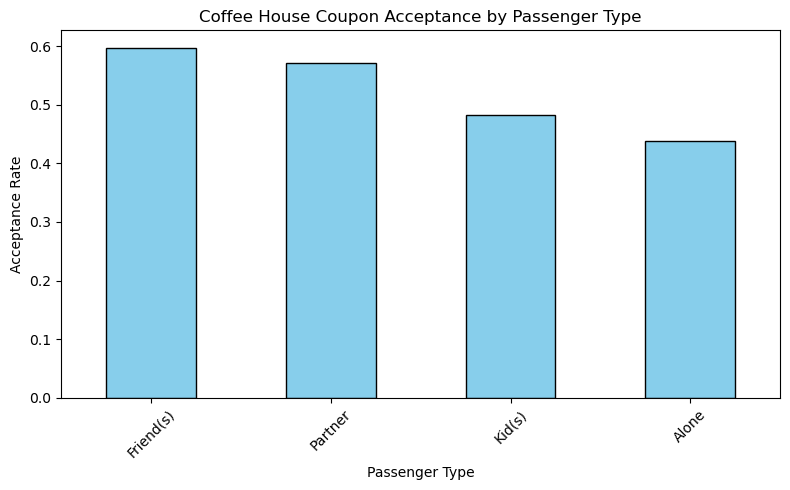

In [57]:
import matplotlib.pyplot as plt

coffee_accept_by_passenger.plot(kind='bar', figsize=(8,5), color='skyblue', edgecolor='black')
plt.title('Coffee House Coupon Acceptance by Passenger Type')
plt.ylabel('Acceptance Rate')
plt.xlabel('Passenger Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [58]:
coffee_accept_by_age = coffee_coupons.groupby('age')['Y'].mean()

In [59]:
coffee_accept_by_income = coffee_coupons.groupby('income')['Y'].mean()

| Passenger Type | Hypothesized Behavior                                                |
| -------------- | -------------------------------------------------------------------- |
| **Friend(s)**  | Highest acceptance — coffee is a social activity.                    |
| **Partner**    | Moderate acceptance — likely to stop together.                       |
| **Alone**      | Lower acceptance — may not detour for coffee.                        |
| **Kid(s)**     | Lowest acceptance — less likely to visit coffee shops with children. |


Hypothesis:
Drivers who accept coffee house coupons tend to travel with friends or partners, 
are younger adults (21–35), and likely view coffee stops as social or leisure 
activities. Solo drivers and those with children as passengers are less inclined 
to accept, indicating that coupon acceptance is driven more by social context 
and convenience than necessity.